# M1: AirBnb Workshop 3

In this notebook we are going to work with the 2021 Airbnb listings in CPH. We are going to explore the dataset and predict some of the variables...(working outline.)

In [25]:
# Import packages

import pandas as pd
import seaborn as sns

In [2]:
# load up the data
listings = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2021-07-20/data/listings.csv.gz')

In [3]:
# first explore

listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20210720033302,2021-07-20,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,https://www.airbnb.com/users/show/16774,...,4.90,4.72,4.71,NaN,f,1,0,1,0,1.61
1,26057,https://www.airbnb.com/rooms/26057,20210720033302,2021-07-20,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,https://www.airbnb.com/users/show/109777,...,4.83,4.96,4.82,NaN,f,1,1,0,0,0.75
2,29118,https://www.airbnb.com/rooms/29118,20210720033302,2021-07-20,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/236213/33956c...,125230,https://www.airbnb.com/users/show/125230,...,5.00,4.85,4.77,NaN,f,1,1,0,0,0.37
3,31094,https://www.airbnb.com/rooms/31094,20210720033302,2021-07-20,"Very central and cozy, new kitchen","<b>The space</b><br />Welcome to our home, we ...","What else is nearby?<br />To be honest, I thin...",https://a0.muscache.com/pictures/19408864/7c4c...,129976,https://www.airbnb.com/users/show/129976,...,4.80,4.85,4.46,NaN,f,1,1,0,0,0.27
4,32379,https://www.airbnb.com/rooms/32379,20210720033302,2021-07-20,120 m2 artist flat on Vesterbro,Bright Artistic luxury apartment in very trend...,"Værnedamsvej area is super hip area, we call i...",https://a0.muscache.com/pictures/4088872/c50ae...,140105,https://www.airbnb.com/users/show/140105,...,4.90,4.87,4.70,NaN,t,1,1,0,0,0.66


In [4]:
# first explore 

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9949 non-null   int64  
 1   listing_url                                   9949 non-null   object 
 2   scrape_id                                     9949 non-null   int64  
 3   last_scraped                                  9949 non-null   object 
 4   name                                          9948 non-null   object 
 5   description                                   9597 non-null   object 
 6   neighborhood_overview                         5611 non-null   object 
 7   picture_url                                   9949 non-null   object 
 8   host_id                                       9949 non-null   int64  
 9   host_url                                      9949 non-null   o

#### Selected variables for further exploration

`['number_of_reviews','review_scores_rating','neighbourhood_cleansed','price', 'availability_365', 'bedrooms','accommodates', 'instant_bookable', 'reviews_per_month', 'property_type', 'room_type']`

In [20]:
columnlist = ['number_of_reviews','review_scores_rating','neighbourhood_cleansed','price', 'availability_365', 'bedrooms','accommodates', 'instant_bookable', 'reviews_per_month', 'property_type', 'room_type']
listings_filtered = listings[columnlist]

In [21]:
listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_of_reviews       9949 non-null   int64  
 1   review_scores_rating    8050 non-null   float64
 2   neighbourhood_cleansed  9949 non-null   object 
 3   price                   9949 non-null   object 
 4   availability_365        9949 non-null   int64  
 5   bedrooms                9713 non-null   float64
 6   accommodates            9949 non-null   int64  
 7   instant_bookable        9949 non-null   object 
 8   reviews_per_month       8050 non-null   float64
 9   property_type           9949 non-null   object 
 10  room_type               9949 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 855.1+ KB


In [22]:
# proposal for removal of $
listings_filtered.price.str[1:]

0         365.00
1       2,400.00
2         729.00
3         750.00
4       1,153.00
          ...   
9944      508.00
9945    1,000.00
9946    1,756.00
9947    1,137.00
9948      650.00
Name: price, Length: 9949, dtype: object

In [23]:
listings_filtered.loc[:,'price'] = listings_filtered.price.str.replace('$','')
listings_filtered.loc[:,'price'] = listings_filtered.price.str.replace(',','')
listings_filtered.loc[:,'price'] = listings_filtered.loc[:,'price'].astype('float')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [24]:
listings_filtered

,number_of_reviews,review_scores_rating,neighbourhood_cleansed,price,availability_365,bedrooms,accommodates,instant_bookable,reviews_per_month,property_type,room_type
0,168,4.78,Nrrebro,365.0,0,1.0,2,f,1.61,Private room in apartment,Private room
1,50,4.90,Indre By,2400.0,347,4.0,6,f,0.75,Entire house,Entire home/apt
2,22,4.91,Vesterbro-Kongens Enghave,729.0,46,1.0,2,f,0.37,Entire apartment,Entire home/apt
3,17,4.87,Vesterbro-Kongens Enghave,750.0,0,1.0,3,f,0.27,Entire apartment,Entire home/apt
4,73,4.89,Vesterbro-Kongens Enghave,1153.0,91,3.0,5,t,0.66,Entire apartment,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...
9944,0,NaN,Amager st,508.0,17,1.0,4,t,NaN,Entire condominium,Entire home/apt
9945,0,NaN,sterbro,1000.0,80,1.0,3,t,NaN,Entire condominium,Entire home/apt
9946,0,NaN,Indre By,1756.0,83,2.0,6,t,NaN,Entire condominium,Entire home/apt
9947,0,NaN,Amager Vest,1137.0,87,NaN,3,f,NaN,Entire apartment,Entire home/apt


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

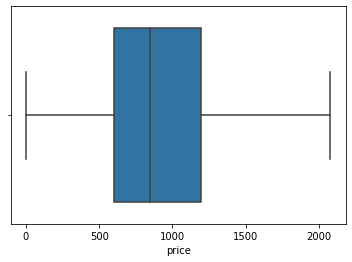

In [27]:
sns.boxplot(listings_filtered.price, showfliers=False)

In [28]:
iqr_price = listings_filtered.price.quantile(0.75) - listings_filtered.price.quantile(0.25)

In [30]:
upper_bound_price = listings_filtered.price.quantile(0.75) + 1.5*iqr_price

In [32]:
listings_filtered = listings_filtered[listings_filtered['price'] <= upper_bound_price]

In [39]:
listings_filtered = listings_filtered[listings_filtered.number_of_reviews > 0]

In [44]:
(listings_filtered.property_type.value_counts() > 100)[:7].index

Index(['Entire apartment', 'Private room in apartment', 'Entire condominium',
       'Entire house', 'Entire townhouse', 'Entire serviced apartment',
       'Private room in house'],
      dtype='object')

In [45]:
property_selection = ['Entire apartment', 'Private room in apartment', 'Entire condominium',
       'Entire house', 'Entire townhouse', 'Entire serviced apartment',
       'Private room in house']
listings_filtered = listings_filtered[listings_filtered['property_type'].isin(property_selection)]

In [65]:
mapper_instant_book = {'t':True, 'f':False}
listings_filtered.instant_bookable = listings_filtered.instant_bookable.map(lambda v: mapper_instant_book[v])

In [66]:
listings_filtered.isnull().sum()

number_of_reviews         0
review_scores_rating      0
neighbourhood_cleansed    0
price                     0
availability_365          0
bedrooms                  0
accommodates              0
instant_bookable          0
reviews_per_month         0
property_type             0
room_type                 0
dtype: int64

In [56]:
listings_filtered.bedrooms = listings_filtered.bedrooms.fillna(listings_filtered.bedrooms.mean())

In [68]:
X = pd.get_dummies(listings_filtered)

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257 entries, 0 to 9833
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   number_of_reviews                                 7257 non-null   int64  
 1   review_scores_rating                              7257 non-null   float64
 2   price                                             7257 non-null   float64
 3   availability_365                                  7257 non-null   int64  
 4   bedrooms                                          7257 non-null   float64
 5   accommodates                                      7257 non-null   int64  
 6   instant_bookable                                  7257 non-null   bool   
 7   reviews_per_month                                 7257 non-null   float64
 8   neighbourhood_cleansed_Amager Vest                7257 non-null   uint8  
 9   neighbourhood_clean

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X.iloc[:,:8] = scaler.fit_transform(X.iloc[:,:8])

In [74]:
X

,number_of_reviews,review_scores_rating,price,availability_365,bedrooms,accommodates,instant_bookable,reviews_per_month,neighbourhood_cleansed_Amager Vest,neighbourhood_cleansed_Amager st,...,neighbourhood_cleansed_sterbro,property_type_Entire apartment,property_type_Entire condominium,property_type_Entire house,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Private room in apartment,property_type_Private room in house,room_type_Entire home/apt,room_type_Private room
0,4.054337,0.097974,-1.357959,-0.860608,-0.726706,-0.861550,-0.462549,0.879801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.018470,0.311526,-0.404953,-0.491228,-0.726706,-0.861550,-0.462549,-0.261346,0,0,...,0,1,0,0,0,0,0,0,1,0
3,-0.157950,0.245818,-0.349971,-0.860608,-0.726706,-0.241777,-0.462549,-0.353374,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1.404222,0.278672,0.705142,-0.129878,1.552014,0.997769,2.161935,0.005535,0,0,...,0,1,0,0,0,0,0,0,1,0
5,-0.436910,-0.246995,-0.698185,0.881903,0.412654,0.377996,-0.462549,-0.546632,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,-0.576389,0.459370,-1.004509,1.941864,-0.726706,-0.861550,-0.462549,1.238710,0,0,...,0,0,0,0,0,0,0,1,0,1
9791,-0.604285,0.459370,-0.637968,-0.828488,-0.726706,0.377996,-0.462549,0.318430,0,0,...,0,0,1,0,0,0,0,0,1,0
9817,-0.604285,-2.826048,-0.580369,-0.354718,1.552014,0.997769,2.161935,0.318430,0,0,...,0,0,1,0,0,0,0,0,1,0
9825,-0.604285,0.459370,-0.219064,1.893684,0.412654,1.617542,-0.462549,0.318430,0,0,...,0,0,1,0,0,0,0,0,1,0


In [81]:
y = listings_filtered.price

In [84]:
X = X.drop(['price'], axis=1)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [86]:
from sklearn.linear_model import LinearRegression
model_ols = LinearRegression()

In [87]:
model_ols.fit(X_train,y_train)

LinearRegression()

In [88]:
model_ols.score(X_test,y_test)

0.4958752720065742

In [89]:
y_pred = model_ols.predict(X_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


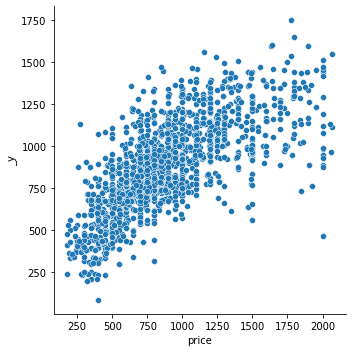

In [90]:
sns.relplot(y_test, y_pred)

In [91]:
from sklearn.metrics import mean_squared_error

In [93]:
from math import sqrt

In [94]:
sqrt(mean_squared_error(y_test,y_pred))

275.622442967619

In [96]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 69.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [97]:
from xgboost import XGBRegressor

In [98]:
model_xgb = XGBRegressor()

In [99]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_pred = model_xgb.predict(X_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


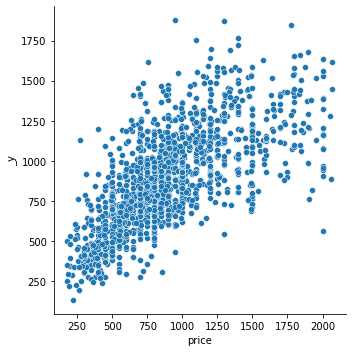

In [101]:
sns.relplot(y_test, y_pred)

In [102]:
sqrt(mean_squared_error(y_test,y_pred))

283.0286862531667

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4108720e-f754-43bd-ab9c-4ddb3f5be514' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>